#Question 2 Akaike and Bayesian Information Criteria
## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,normalize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

In [2]:
Data=pd.read_csv('/content/drive/MyDrive/ID5055 assignments/Linear regression Tut/poly_reg2.csv')

In [3]:
Data.head()

,x,y
0,-5.0,-0.680180
1,-4.9,-1.104312
2,-4.8,-2.369426
3,-4.7,-2.581811
4,-4.6,-1.512829


In [4]:
X_train,X_test,y_train,y_test=train_test_split(Data['x'].values,Data['y'].values,test_size=0.2,shuffle=True,random_state=42)

In [5]:
def reg(x_train,x_test,y_train,y_test,k=1):
  poly_train=PolynomialFeatures(degree=k,include_bias=False)
  poly_test=PolynomialFeatures(degree=k,include_bias=False)
  p_x_train=poly_train.fit_transform(x_train.reshape(-1,1))
  p_x_train=normalize(p_x_train)
  p_x_test=poly_test.fit_transform(x_test.reshape(-1,1))
  p_x_test=normalize(p_x_test)
  model=LinearRegression()
  model.fit(p_x_train,y_train)
  y_pred_train=model.predict(p_x_train)
  y_pred_test=model.predict(p_x_test)
  train_err=mean_squared_error(y_train,y_pred_train)
  test_err=mean_squared_error(y_test,y_pred_test)
  num=len(model.coef_)+1
  n=p_x_train.shape[0]
  AIC=n*np.log(train_err)+2*num
  BIC=n*np.log(train_err)+np.log(n)*num
  AICc=AIC+(2*num*(num+1))/(n-num-1)
  return AIC,BIC,AICc,test_err

In [6]:
AIC=[]
BIC=[]
AICc=[]
Test_error=[]
numfeat=np.arange(1,31)
for i in numfeat:
  aic,bic,aicc,test_err=reg(X_train,X_test,y_train,y_test,k=i)
  AIC.append(aic)
  BIC.append(bic)
  AICc.append(aicc)
  Test_error.append(test_err)

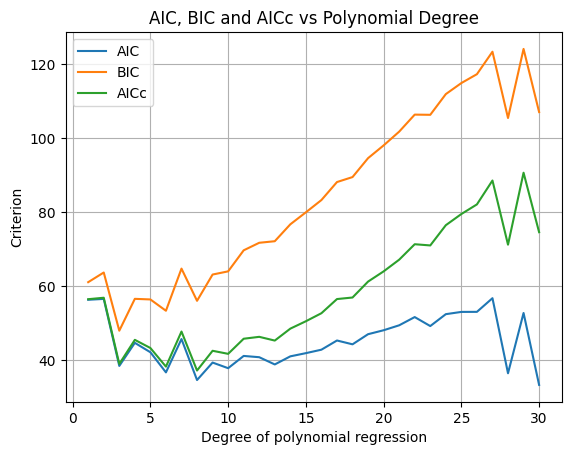

In [7]:
plt.plot(numfeat,AIC,label='AIC')
plt.plot(numfeat,BIC,label='BIC')
plt.plot(numfeat,AICc,label='AICc')
plt.legend()
plt.title("AIC, BIC and AICc vs Polynomial Degree")
plt.xlabel("Degree of polynomial regression")
plt.ylabel("Criterion")
plt.grid()
plt.show()

In [8]:
idx_AIC=np.argmin(AIC)
idx_BIC=np.argmin(BIC)
idx_AICc=np.argmin(AICc)
print(f"Number of optimal features by AIC is {numfeat[idx_AIC]} and test MSE {Test_error[idx_AIC]:.2f}")
print(f"Number of optimal features by BIC is {numfeat[idx_BIC]} and test MSE {Test_error[idx_BIC]:.2f}")
print(f"Number of optimal features by AICc is {numfeat[idx_AICc]} and test MSE {Test_error[idx_AICc]:.2f}")

Number of optimal features by AIC is 30 and test MSE 7.99
Number of optimal features by BIC is 3 and test MSE 2.05
Number of optimal features by AICc is 8 and test MSE 2.11
